# Multi-Linear Regression

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats

In [4]:
df=pd.read_csv("C:/Users/samdc/OneDrive/Desktop/AI ML/tips - tips.csv")

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.sample(7)

,total_bill,tip,sex,smoker,day,time,size
30,9.55,1.45,Male,No,Sat,Dinner,2
164,17.51,3.00,Female,Yes,Sun,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2
41,17.46,2.54,Male,No,Sun,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
115,17.31,3.50,Female,No,Sun,Dinner,2


In [7]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [16]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [21]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [23]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Exploratory Data Analysis

### Vizualization

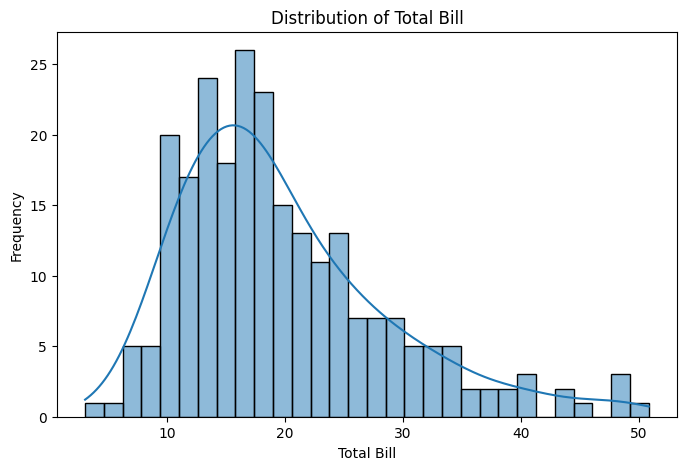

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total_bill'], bins=30, kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

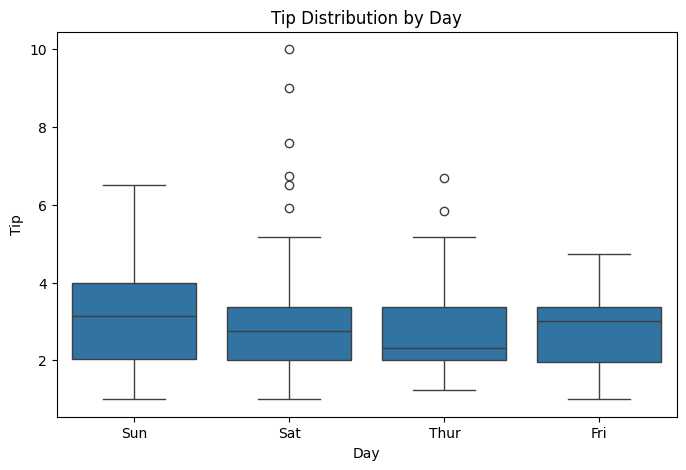

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tip Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

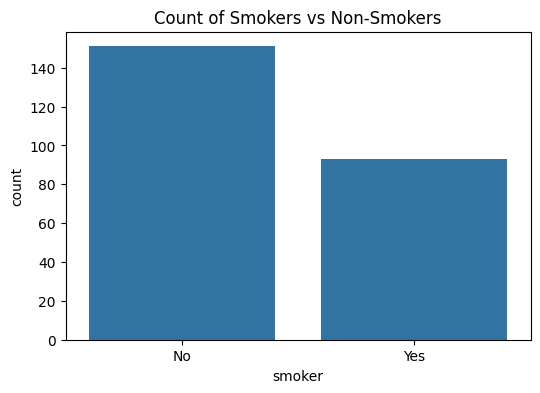

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df)
plt.title('Count of Smokers vs Non-Smokers')
plt.show()

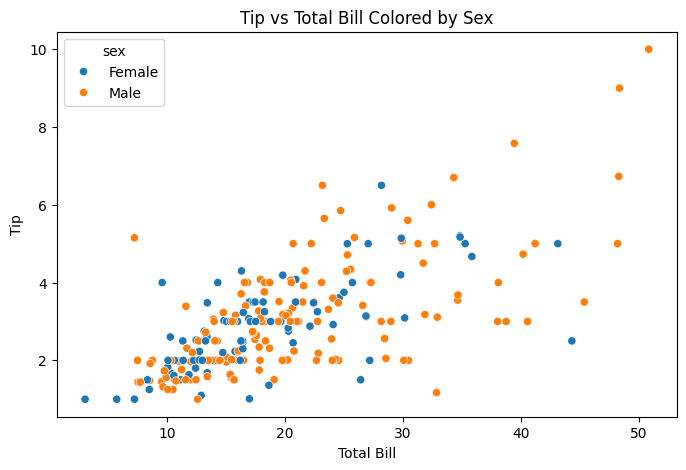

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title('Tip vs Total Bill Colored by Sex')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


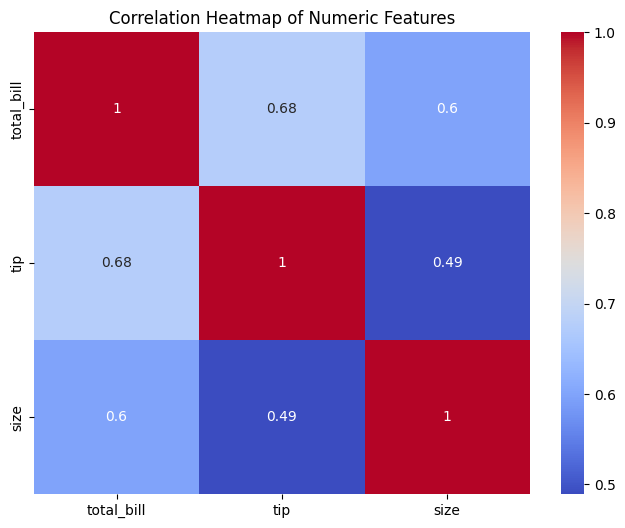

In [35]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Outliers Detection

In [38]:
num_cols=df.select_dtypes(include=[np.number]).columns

In [40]:
Q1=df[num_cols].quantile(0.25)
Q3=df[num_cols].quantile(0.75)

In [42]:
print("Quartile 1 :\n",Q1)
print("Quartile 3 :\n",Q3)

Quartile 1 :
 total_bill    13.3475
tip            2.0000
size           2.0000
Name: 0.25, dtype: float64
Quartile 3 :
 total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64


In [44]:
IQR=Q3-Q1

In [46]:
iqr_outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
iqr_outlier=((df[num_cols]<Q1-(1.5*IQR)) | (df[num_cols]>Q3 +(1.5*IQR))).sum()

In [48]:
z = np.abs(stats.zscore(df[num_cols]))
zscore_outlier_mask = z > 3
outlier_zscore = (z > 3).sum(axis=0)

In [50]:
print("IQR outliers:\n", iqr_outlier)
print("Z-score outliers:\n", outlier_zscore)

IQR outliers:
 total_bill    9
tip           9
size          9
dtype: int64
Z-score outliers:
 total_bill    4
tip           3
size          4
dtype: int64


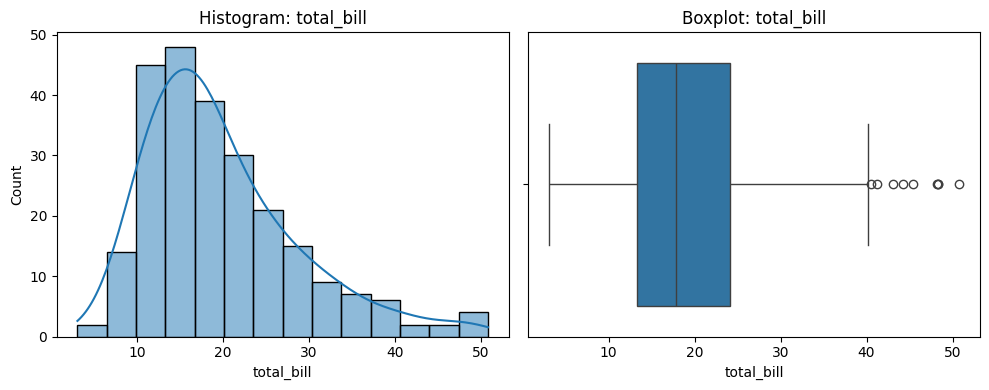

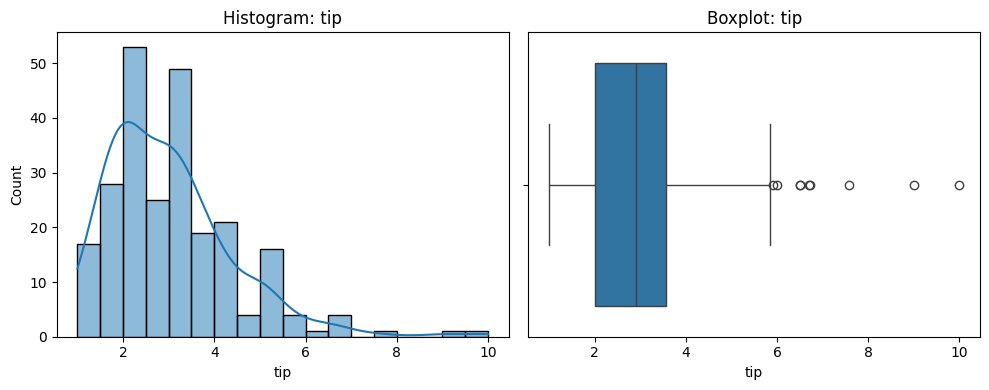

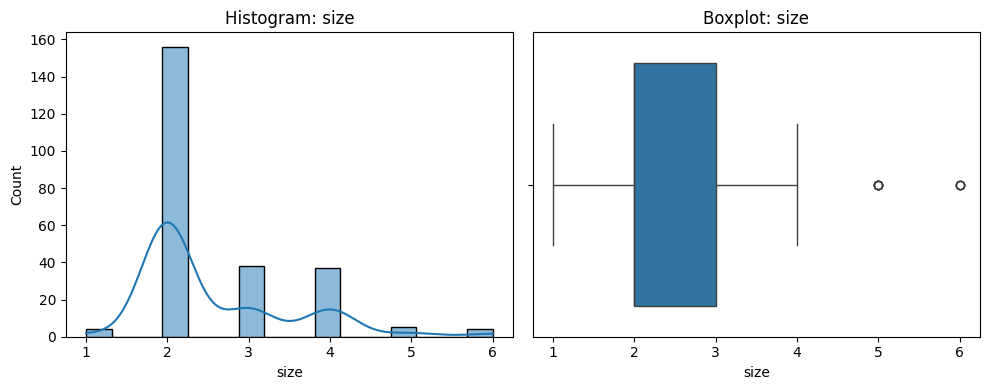

In [52]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram: {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

### Droping Outliers

In [54]:
# Combine masks: rows with outliers by either method
combined_outlier_mask = iqr_outlier_mask.any(axis=1) | zscore_outlier_mask.any(axis=1)

In [56]:
# Create cleaned dataset by removing outlier rows
df_cleaned = df[~combined_outlier_mask].copy()


In [59]:
# Check shapes before and after
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (244, 7)
Cleaned shape: (223, 7)


In [61]:
df_cleaned.to_csv('tips_cleaned.csv', index=False)

## Mutlinear Regression

In [64]:
# Encode categorical variables and prepare features/target
X = pd.get_dummies(df_cleaned.drop('tip', axis=1), drop_first=True)
y = df_cleaned['tip']

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:

y_pred = model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5302606901799164
R-squared: 0.4395689103225353


In [76]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.08291921  0.03864524 -0.17358266  0.10149536 -0.08821967  0.22174651
 -0.06041716  0.02335491]
Intercept: 1.2112989953182727


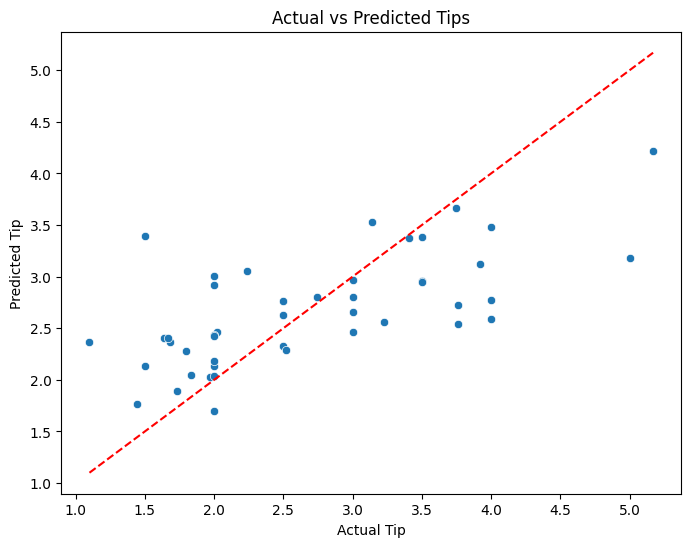

In [78]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual vs Predicted Tips')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.show()

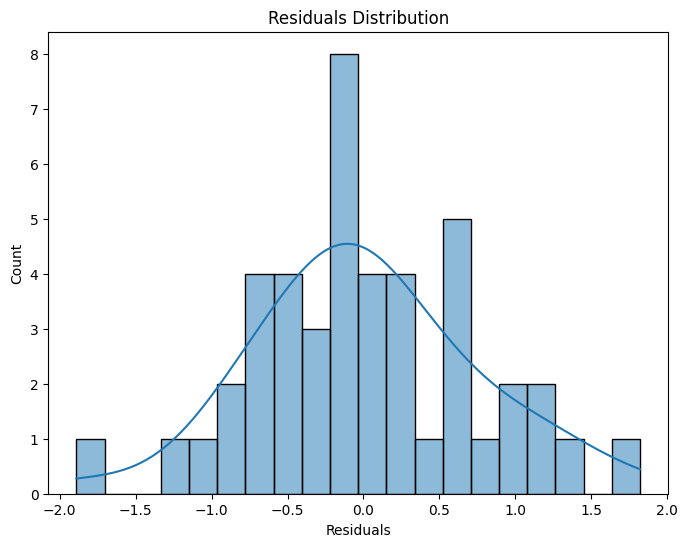

In [80]:
# Histogram: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

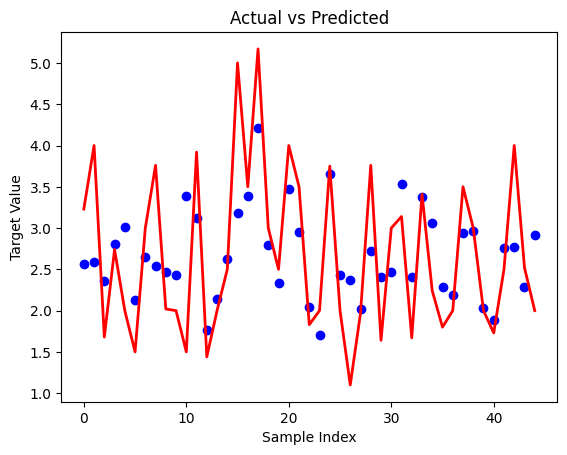

In [82]:
plt.plot(y_test.values, label='Actual', color='red', linewidth=2)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='blue')

plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.show()
